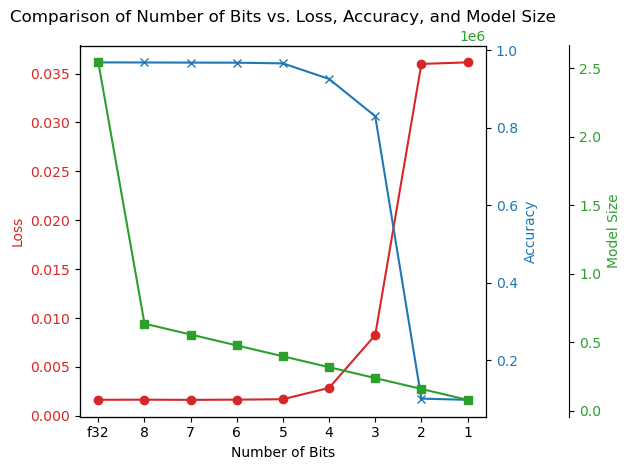

In [1]:
import matplotlib.pyplot as plt

# Data
data = [
    ('f32', 0.0016335660570301115, 0.9682, 2544320),
    (8, 0.00164395876605995, 0.9679, 636080),
    (7, 0.0016274031238630415, 0.9676, 556570),
    (6, 0.0016465228750370442, 0.9674, 477060),
    (5, 0.001692030584346503, 0.9656, 397550),
    (4, 0.0028505238730460406, 0.9254, 318040),
    (3, 0.008253928826749324, 0.8293, 238530),
    (2, 0.03599247262477875, 0.1012, 159020),
    (1, 0.03615058648586273, 0.098, 79510)
]

# Prepare the data
num_bits = [d[0] for d in data]
loss = [d[1] for d in data]
accuracy = [d[2] for d in data]
model_size = [d[3] for d in data]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot num_bits vs. loss
color = 'tab:red'
ax1.set_xlabel('Number of Bits')
ax1.set_ylabel('Loss', color=color)
ax1.plot(num_bits, loss, color=color, marker='o', label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(num_bits, accuracy, color=color, marker='x', label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis to plot model size
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Model Size', color=color)
ax3.plot(num_bits, model_size, color=color, marker='s', label='Model Size')
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Comparison of Number of Bits vs. Loss, Accuracy, and Model Size')

# Show plot
fig.tight_layout()
plt.show()



In [2]:
# prompt: import csv file to pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your CSV file is named 'data.csv'
df = pd.read_csv('csv/neuron50_20_41.csv')

print(df.head())




   Generation                                          Candidate  \
0           0  1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...   
1           0  3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...   
2           0  4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...   
3           0  3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,...   
4           0  1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...   

                            Fitness  
0              0.8992,311.572265625  
1                 0.8992,78.6328125  
2  0.10240000000000005,159.23828125  
3              0.2098,464.892578125  
4                0.8992,310.5859375  


In [3]:
def add_commas(s):
    return s.replace(' ', ', ')

# Apply the function to correct the string format
df['Candidate'] = df['Candidate'].apply(add_commas)
df['Fitness'] = df['Fitness'].apply(add_commas)


df['Candidate'] = df['Candidate'].apply(lambda x: pd.eval(x))
df['Fitness'] = df['Fitness'].apply(lambda x: pd.eval(x))


# Assuming 'Candidate' column contains lists of 111 elements
df['input'] = df['Candidate'].apply(lambda x: x[0])
df['l1'] = df['Candidate'].apply(lambda x: x[1:101])
df['l2'] = df['Candidate'].apply(lambda x: x[101:])

print(df.head())



   Generation                                          Candidate  \
0           0  [1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
1           0  [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2           0  [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3           0  [3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...   
4           0  [1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   

                               Fitness  input  \
0              [0.8992, 311.572265625]      1   
1                 [0.8992, 78.6328125]      3   
2  [0.10240000000000005, 159.23828125]      4   
3              [0.2098, 464.892578125]      3   
4                [0.8992, 310.5859375]      1   

                                                  l1  \
0  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...   
4  [4, 4, 4, 4, 

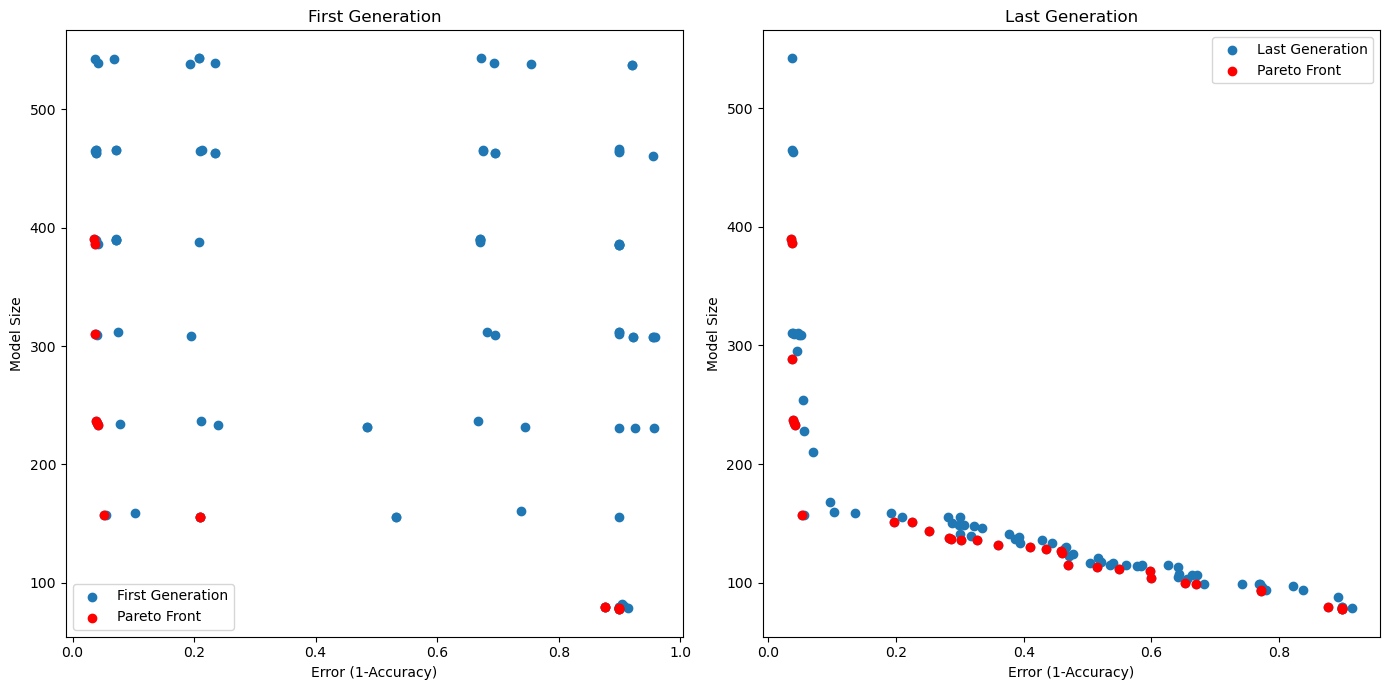

In [4]:
# Extract data for the first and last generation
first_gen = df[df['Generation'] == df['Generation'].min()]
last_gen = df[df['Generation'] == df['Generation'].max()]

def identify_pareto(points):
    is_pareto = np.ones(points.shape[0], dtype=bool)
    for i in range(points.shape[0]):
        for j in range(points.shape[0]):
            if all(points[j] <= points[i]) and any(points[j] < points[i]):
                is_pareto[i] = False
                break
    return is_pareto


# Convert fitness arrays to 2D arrays for processing
first_gen_fitness = np.vstack(first_gen['Fitness'].values)
last_gen_fitness = np.vstack(last_gen['Fitness'].values)

# Identify Pareto points
pareto_first = identify_pareto(first_gen_fitness)
pareto_last = identify_pareto(last_gen_fitness)

# Plotting
plt.figure(figsize=(14, 7))

#fix y axis 0-600


# Plot first generation
plt.subplot(1, 2, 1)
plt.scatter(first_gen_fitness[:, 0], first_gen_fitness[:, 1], label='First Generation')
plt.scatter(first_gen_fitness[pareto_first, 0], first_gen_fitness[pareto_first, 1], color='r', label='Pareto Front')
plt.xlabel('Error (1-Accuracy)')
plt.ylabel('Model Size')
plt.title('First Generation')
plt.legend()

# Plot last generation
plt.subplot(1, 2, 2)
plt.scatter(last_gen_fitness[:, 0], last_gen_fitness[:, 1], label='Last Generation')
plt.scatter(last_gen_fitness[pareto_last, 0], last_gen_fitness[pareto_last, 1], color='r', label='Pareto Front')
plt.xlabel('Error (1-Accuracy)')
plt.ylabel('Model Size')
plt.title('Last Generation')
plt.legend()

plt.tight_layout()
plt.show()


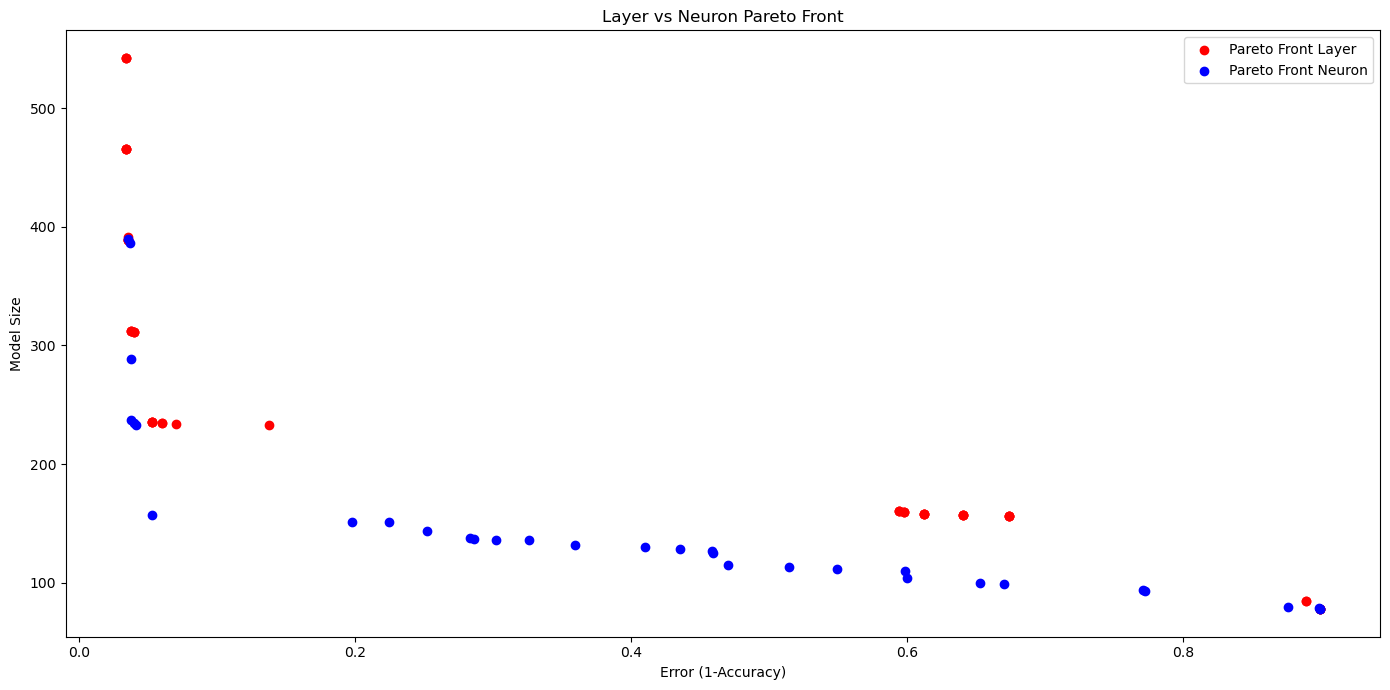

In [6]:
df2 = pd.read_csv('csv/nlayer50_20_69.csv')

# Apply the function to correct the string format
df2['Candidate'] = df2['Candidate'].apply(add_commas)
df2['Fitness'] = df2['Fitness'].apply(add_commas)


df2['Candidate'] = df2['Candidate'].apply(lambda x: pd.eval(x))
df2['Fitness'] = df2['Fitness'].apply(lambda x: pd.eval(x))

last_gen2 = df2[df2['Generation'] == df2['Generation'].max()]
last_gen_fitness2 = np.vstack(last_gen2['Fitness'].values)
pareto_last2 = identify_pareto(last_gen_fitness2)

plt.figure(figsize=(14, 7))
plt.scatter(last_gen_fitness2[pareto_last2, 0], last_gen_fitness2[pareto_last2, 1], color='r', label='Pareto Front Layer')
plt.scatter(last_gen_fitness[pareto_last, 0], last_gen_fitness[pareto_last, 1], color='b', label='Pareto Front Neuron')
plt.xlabel('Error (1-Accuracy)')
plt.ylabel('Model Size')
plt.title('Layer vs Neuron Pareto Front')
plt.legend()

plt.tight_layout()
plt.show()

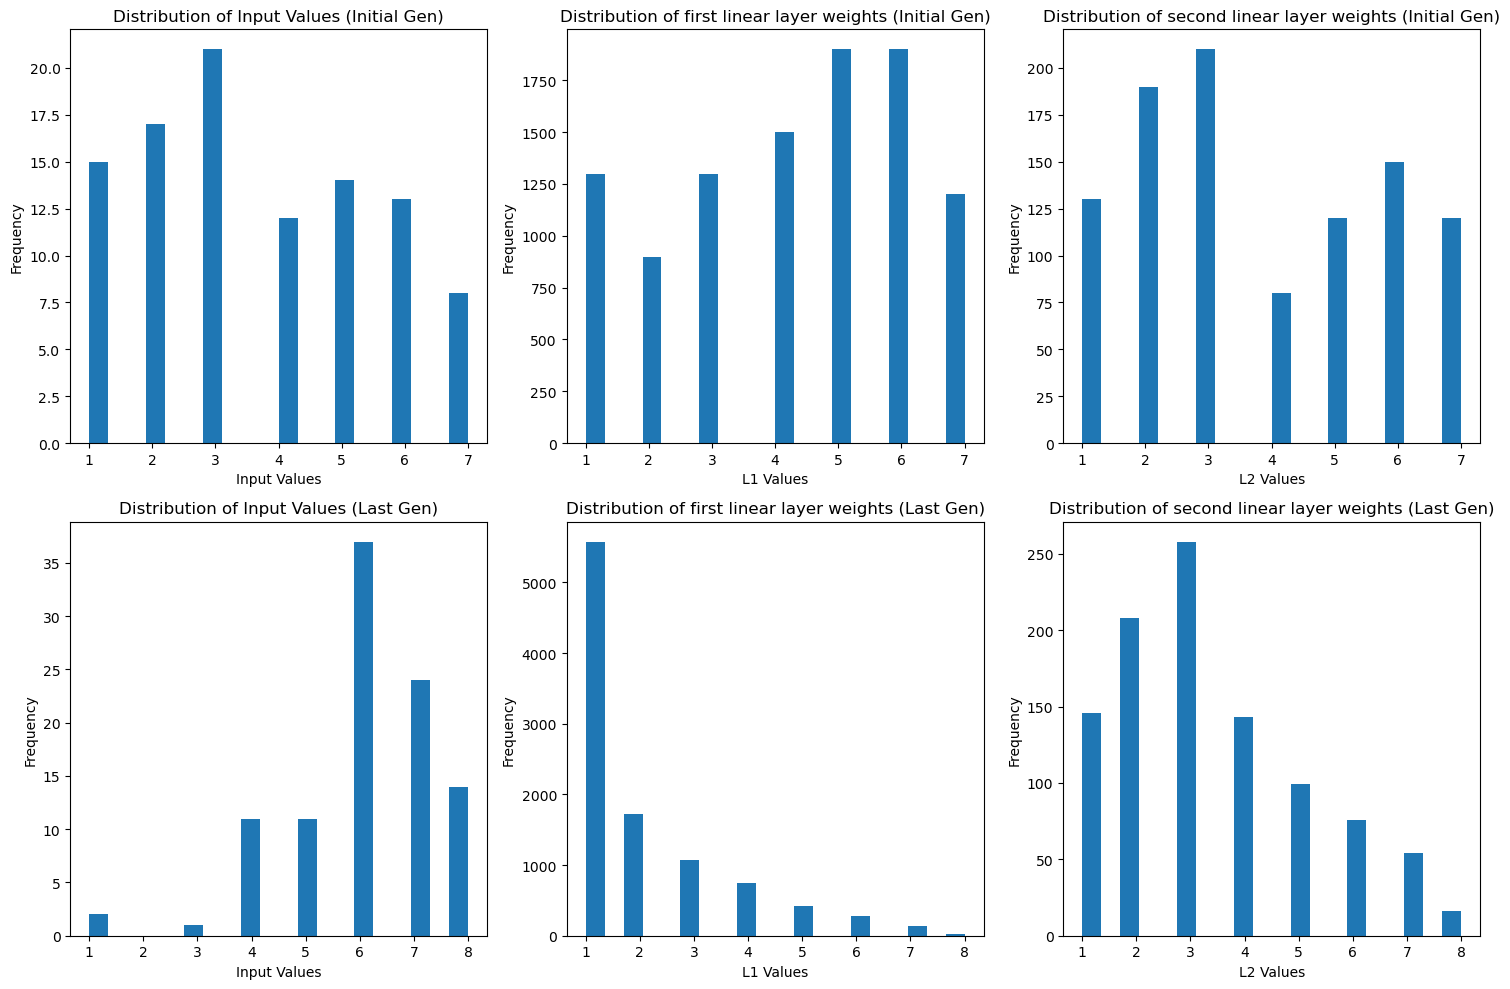

In [7]:
# Extract the first generation data
ini_gen = df[df['Generation'] == df['Generation'].min()]
last_gen = df[df['Generation'] == df['Generation'].max()]

# Plotting the distributions
plt.figure(figsize=(15, 10))

# Input distribution
plt.subplot(2, 3, 1)
plt.hist(ini_gen['input'], bins=20)
plt.xlabel('Input Values')
plt.ylabel('Frequency')
plt.title('Distribution of Input Values (Initial Gen)')

# L1 distribution
plt.subplot(2, 3, 2)
plt.hist(ini_gen['l1'].explode(), bins=20)  # Explode to handle lists
plt.xlabel('L1 Values')
plt.ylabel('Frequency')
plt.title('Distribution of first linear layer weights (Initial Gen)')

# L2 distribution
plt.subplot(2, 3, 3)
plt.hist(ini_gen['l2'].explode(), bins=20)  # Explode to handle lists
plt.xlabel('L2 Values')
plt.ylabel('Frequency')
plt.title('Distribution of second linear layer weights (Initial Gen)')

plt.subplot(2, 3, 4)
plt.hist(last_gen['input'], bins=20)
plt.xlabel('Input Values')
plt.ylabel('Frequency')
plt.title('Distribution of Input Values (Last Gen)')

# L1 distribution
plt.subplot(2, 3, 5)
plt.hist(last_gen['l1'].explode(), bins=20)  # Explode to handle lists
plt.xlabel('L1 Values')
plt.ylabel('Frequency')
plt.title('Distribution of first linear layer weights (Last Gen)')

# L2 distribution
plt.subplot(2, 3, 6)
plt.hist(last_gen['l2'].explode(), bins=20)  # Explode to handle lists
plt.xlabel('L2 Values')
plt.ylabel('Frequency')
plt.title('Distribution of second linear layer weights (Last Gen)')

plt.tight_layout()
plt.show()



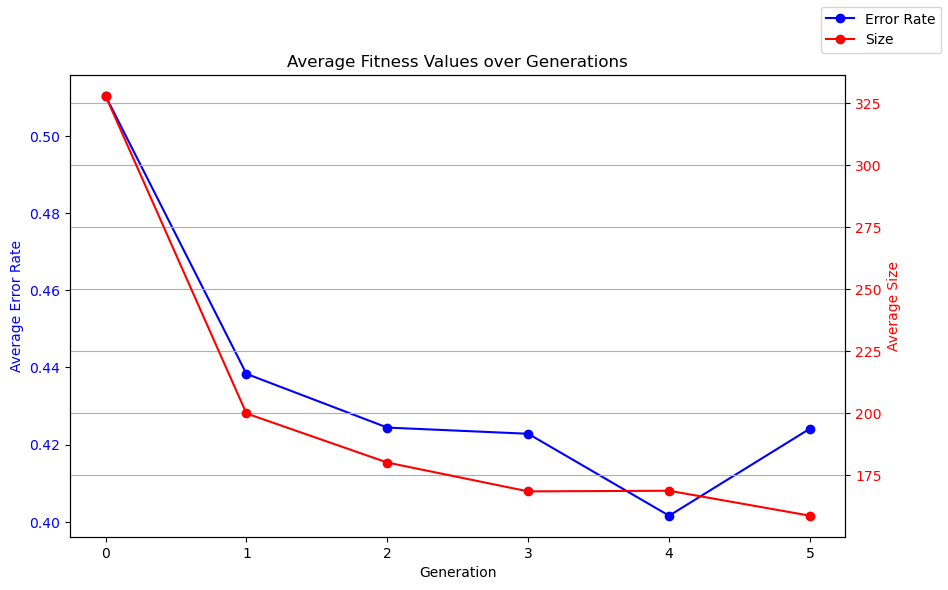

In [9]:
# Extract Accuracy and Size from Fitness column
df['Accuracy'] = df['Fitness'].apply(lambda x: x[0])
df['Size'] = df['Fitness'].apply(lambda x: x[1])

# Calculate average fitness components for each generation
avg_fitness = df.groupby('Generation')[['Accuracy', 'Size']].mean().reset_index()

# Plotting with two different scales
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Accuracy on primary y-axis
ax1.plot(avg_fitness['Generation'], avg_fitness['Accuracy'], marker='o', color='b', label='Error Rate')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Average Error Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a secondary y-axis for Size
ax2 = ax1.twinx()
ax2.plot(avg_fitness['Generation'], avg_fitness['Size'], marker='o', color='r', label='Size')
ax2.set_ylabel('Average Size', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Average Fitness Values over Generations')
fig.legend(loc='upper right')

# Grid and display
plt.grid(True)
plt.show()